# MCMC For Order 0, 1, and 2

In [1]:
using HierarchicalLattices
using MultihistogramAnalysis
using Plots
using LaTeXStrings
using ProgressMeter
using StatsBase
using DataFrames

In [2]:
function create_histogram_df(histogram_fit)
    xdata = histogram_fit.edges[1]
    ydata = histogram_fit.edges[2]

    xx = [x for _ in ydata[1:end-1] for x in xdata[1:end-1]]
    yy = [y for y in ydata[1:end-1] for x in xdata[1:end-1]]
    zz = vec(histogram_fit.weights)

    return DataFrame(
        :M => xx,
        :U => yy,
        :f => zz
    )
end

create_histogram_df (generic function with 1 method)

In [3]:
DO0 = DiamondLattice(diamond_ising_lattice(0, :infty), 0)
DO1 = DiamondLattice(diamond_ising_lattice(1, :infty), 1)
DO2 = DiamondLattice(diamond_ising_lattice(2, :infty), 2)
DO5 = DiamondLattice(diamond_ising_lattice(5, :infty), 5)

ID0 = WolffData(DO0, Float64[], Float64[], 1, 100)
ID1 = WolffData(DO1, Float64[], Float64[], 1, 100)
ID2 = WolffData(DO2, Float64[], Float64[], 1, 100)
ID5 = WolffData(DO5, Float64[], Float64[], 1, 100)

WolffData{DiamondLattice}(DiamondLattice(5, {684, 1024} undirected Int64 metagraph with Float64 weights defined by :weight (default weight 1.0), {684, 1024} undirected Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)), Float64[], Float64[], 1, 100)

In [4]:
Trange = 1:0.2:10
M0_arrays = []
M1_arrays = []
M2_arrays = []
M5_arrays = []
U0_arrays = []
U1_arrays = []
U2_arrays = []
U5_arrays = []

N0 = length(DO0.final_state.vprops)
N1 = length(DO1.final_state.vprops)
N2 = length(DO2.final_state.vprops)

12

In [5]:
nsweeps = 3000

3000

In [6]:
@showprogress for T in Trange
    # Start simulation
    wolff!(ID0, nsweeps, T; showprogress = false)
    
    push!(U0_arrays, copy(ID0.internalenergy_history))
    push!(M0_arrays, copy(ID0.magnetization_history))
    ID0.internalenergy_history = Float64[]
    ID0.magnetization_history = Float64[]
    
    
    wolff!(ID1, nsweeps, T; showprogress = false)
    push!(U1_arrays, copy(ID1.internalenergy_history))
    push!(M1_arrays, copy(ID1.magnetization_history))
    ID1.internalenergy_history = Float64[]
    ID1.magnetization_history = Float64[]
    
    
    wolff!(ID2,nsweeps, T; showprogress = false)
    push!(U2_arrays, copy(ID2.internalenergy_history))
    push!(M2_arrays, copy(ID2.magnetization_history))
    ID2.internalenergy_history = Float64[]
    ID2.magnetization_history = Float64[]
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:11


In [240]:
for T in Trange
    @show T
    
    wolff!(ID5, nsweeps, T; showprogress = true)
    
    push!(U5_arrays, copy(ID5.internalenergy_history))
    push!(M5_arrays, copy(ID5.magnetization_history))
    ID5.internalenergy_history = Float64[]
    ID5.magnetization_history = Float64[]
end

T = 1.0
Progress: 100%|███████████████████████████| Time: 0:00:08 ( 2.82 ms/it)
T = 1.2
Progress: 100%|███████████████████████████| Time: 0:00:00 ( 2.35 ms/it)
Progress: 100%|███████████████████████████| Time: 0:00:07 ( 2.55 ms/it)
T = 1.4
Progress: 100%|███████████████████████████| Time: 0:00:00 ( 2.11 ms/it)
Progress: 100%|███████████████████████████| Time: 0:00:06 ( 2.16 ms/it)
T = 1.6
Progress: 100%|███████████████████████████| Time: 0:00:00 ( 1.04 ms/it)
Progress: 100%|███████████████████████████| Time: 0:00:03 ( 1.32 ms/it)
T = 1.8
Progress: 100%|███████████████████████████| Time: 0:00:01 ( 0.58 ms/it)
T = 2.0
Progress: 100%|███████████████████████████| Time: 0:00:01 ( 0.41 ms/it)
T = 2.2
Progress: 100%|███████████████████████████| Time: 0:00:01 ( 0.36 ms/it)
T = 2.4
Progress: 100%|███████████████████████████| Time: 0:00:00 ( 0.32 ms/it)
T = 2.6
Progress: 100%|███████████████████████████| Time: 0:00:00 ( 0.31 ms/it)
T = 2.8
Progress: 100%|███████████████████████████| Time: 0:00:0

In [7]:
function array_to_hist(Marray, Uarray; dM = 2, dU = 2)
    minM, maxM = minimum(Marray), maximum(Marray)
    minU, maxU = minimum(Uarray), maximum(Uarray)
    
    hist = fit(Histogram, (Marray, Uarray), (minM:dM:maxM+dM, minU:dU:maxU+dU))
    return create_histogram_df(hist)
end

array_to_hist (generic function with 1 method)

In [8]:
O0_hists = DataFrame[]
O1_hists = DataFrame[]
O2_hists = DataFrame[]
O5_hists = DataFrame[]

DataFrame[]

In [9]:
@showprogress for idx in eachindex(Trange)
    push!(O0_hists, array_to_hist(M0_arrays[idx], U0_arrays[idx]))
    push!(O1_hists, array_to_hist(M1_arrays[idx], U1_arrays[idx]))
    push!(O2_hists, array_to_hist(M2_arrays[idx], U2_arrays[idx]))
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


In [242]:
@showprogress for idx in eachindex(Trange)
    push!(O5_hists, array_to_hist(M5_arrays[idx], U5_arrays[idx]))
end

In [10]:
MHData0 = MultihistogramData(2, collect(Trange), O0_hists)
MHData1 = MultihistogramData(2, collect(Trange), O1_hists)
MHData2 = MultihistogramData(2, collect(Trange), O2_hists);
# MHData5 = MultihistogramData(2, collect(Trange), O5_hists);

[ Info: Generating marginal histograms and tuple iterators
[ Info: Generating marginal histograms and tuple iterators
[ Info: Generating marginal histograms and tuple iterators


In [11]:
calculate_free_energies!(MHData0);

Minimizing:  Time: 0:00:00 (8 iterations)6)


In [12]:
calculate_free_energies!(MHData1);

Minimizing:  Time: 0:00:00 (14 iterations)14)


In [13]:
calculate_free_energies!(MHData2);

Minimizing:  Time: 0:00:02 (42 iterations)20)


In [14]:
imrange = range(0, 2π, length = 1000);

In [17]:
function qtys_I_want(imrange, MHData)
    N = length(imrange)
    U  = zeros(ComplexF64, N)
    M  = zeros(ComplexF64, N)
    U2 = zeros(ComplexF64, N)
    M2 = zeros(ComplexF64, N)
    
    @showprogress for idx in eachindex(imrange)
        u, u2 = interpolate_energy_second_moment(1im*imrange[idx], MHData, isbeta = true, returnlinear = true)
        m, m2 = interpolate_observable_second_moment(1im*imrange[idx], :M, MHData, isbeta = true, returnlinear = true)

        U[idx]  = u
        M[idx]  = m
        U2[idx] = u2
        M2[idx] = m2
    end
    return U, M, U2, M2
end

qtys_I_want (generic function with 2 methods)

In [19]:
U, M, U2, M2 = qtys_I_want(imrange, MHData2)

Progress: 100%|█████████████████████████████████████████| Time: 0:01:30


(ComplexF64[-0.034175894133518625 + 0.0im, -0.0341734064093977 - 0.09945451047013054im, -0.03416591285187209 - 0.19889220477868985im, -0.03415332220737355 - 0.2982962344401363im, -0.034135482059307165 - 0.3976496860640583im, -0.03411217833734703 - 0.49693554825837744im, -0.03408313463020107 - 0.5961366777536529im, -0.034048011301907266 - 0.6952357644794326im, -0.034006404412039615 - 0.7942152953154639im, -0.033957844439498786 - 0.8930575162305803im  …  -0.03395784443949168 + 0.8930575162305869im, -0.034006404412039615 + 0.7942152953154631im, -0.03404801130192325 + 0.6952357644794391im, -0.03408313463020107 + 0.5961366777536539im, -0.03411217833736124 + 0.4969355482583858im, -0.034135482059307165 + 0.39764968606406im, -0.03415332220738598 + 0.2982962344401453im, -0.03416591285187209 + 0.19889220477869213im, -0.0341734064093977 + 0.09945451047014096im, -0.034175894133518625 + 3.873139908273704e-15im], ComplexF64[0.02135777283504936 + 0.0im, 0.021359308406497135 + 0.00019207362883897272im

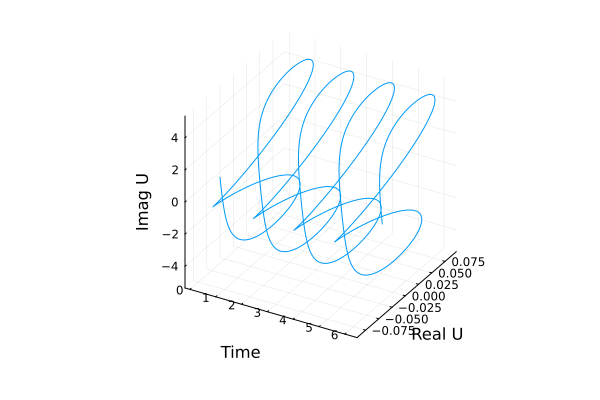

In [20]:
plot(imrange, real.(U), imag.(U), xlabel = "Time", ylabel = "Real U", zlabel = "Imag U", label = false)

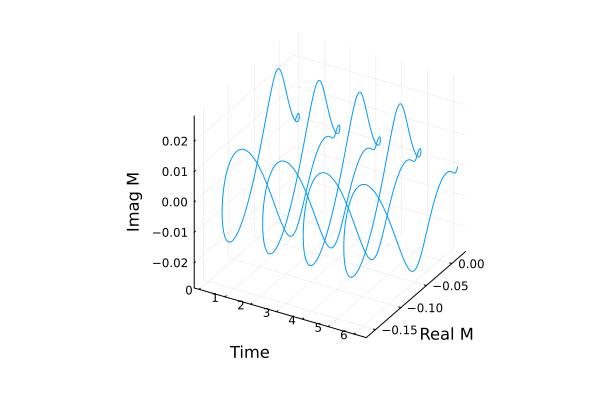

In [21]:
plot(imrange, real.(M), imag.(M), xlabel = "Time", ylabel = "Real M", zlabel = "Imag M", label = false)

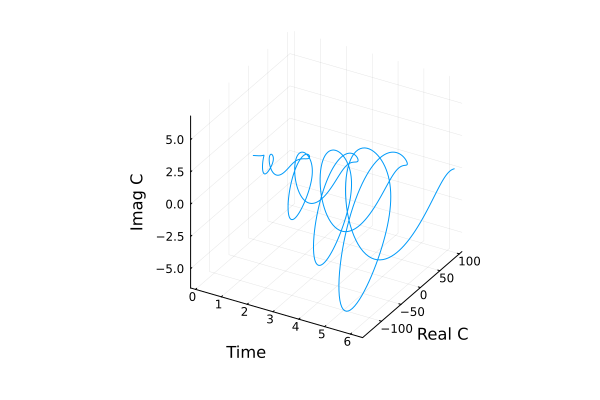

In [22]:
Cv = @. (U2 - U^2) * imrange
plot(imrange, real.(Cv), imag.(Cv), xlabel = "Time", ylabel = "Real C", zlabel = "Imag C", label = false)

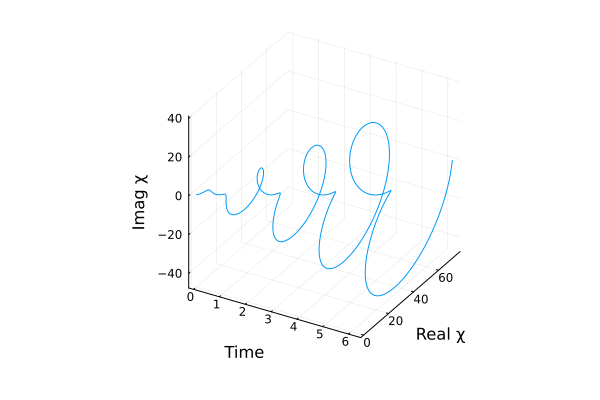

In [23]:
χ = @. (M2 - M^2) * imrange
plot(imrange, real.(χ), imag.(χ), xlabel = "Time", ylabel = "Real χ", zlabel = "Imag χ", label = false)

In [25]:
plotly()
plot(imrange, real.(Cv))

┌ Warning: backend `PlotlyBase` is not installed.
└ @ Plots ~/.julia/packages/Plots/tDHxD/src/backends.jl:43


In [27]:
[0.77,2.35,3.92,5.49] ./ 0.77

4-element Vector{Float64}:
 1.0
 3.051948051948052
 5.090909090909091
 7.12987012987013

In [17]:
DQPT_O0 = (x -> interpolate_free_energy(x, MHData0, isbeta = true)).(imrange .* 1im);

In [18]:
DQPT_O1 = (x -> interpolate_free_energy(x, MHData1, isbeta = true)).(imrange .* 1im)
DQPT_O2 = (x -> interpolate_free_energy(x, MHData2, isbeta = true)).(imrange .* 1im);

In [44]:
imrange = range(-π, π, length = 500)
Mimagrange = (x -> interpolate_observable_tmp(x, :M, MHData2, isbeta = true)).(1im * imrange);

In [45]:
plotly()
fig = plot(imrange, real.(Mimagrange), imag.(Mimagrange), xlabel = "Time", ylabel = "Real", zlabel = "Imag")
plot!(fig, imrange, zeros(length(imrange)), zeros(length(imrange)), color = :black)
# savefig(fig, "O2_M_complexbeta.png")

In [46]:
plot(imrange, real.(Mimagrange))

In [43]:

function interpolate_observable_tmp(parameter_value, observable, data::MultihistogramData; isbeta = false)
    total = 0.
    if !isbeta
        β = 1/parameter_value
    else
        β = parameter_value
    end
    
    Tvec = data.parameter_values
    F    = interpolate_free_energy(parameter_value, data, isbeta = isbeta)
    u    = data.free_energies
    J    = length(Tvec)
    A    = -1/2 * (maximum(u) + minimum(u))
    Oranges = (x -> x[observable]).(data.observable_ranges)
    Omin = minimum(minimum.(Oranges))
    
    for i in 1:J
        for state in data.tuple_iterators[i]
            if state.f == 0
                continue
            end
            num = state.f * (getproperty(state, observable) - Omin)
            den = sum([ exp(-A-u[j]+(β - 1/Tvec[j]) * state.U) for j in 1:J])
            total += num/den
        end
    end
    
    return exp(log(total) - F) + Omin
end


interpolate_observable_tmp (generic function with 1 method)

In [41]:
interpolate_observable_tmp(0, :M, MHData2, isbeta = true)

(total, F) = (474.534347819031, 3.6787643112975905)


-0.016032779156347488

In [27]:
interpolate_free_energy(0, MHData2, isbeta = true)

3.6787643112975905

In [75]:
plot(imrange, real.(Mimagrange0), imag.(Mimagrange0), xlabel = "Time", ylabel = "Real", zlabel = "Imag")
plot!(imrange, zeros(length(imrange)), zeros(length(imrange)), color = :black)

In [78]:
plot(imrange, real.(Fimagrange0), imag.(Fimagrange0), xlabel = "Time", ylabel = "Real", zlabel = "Imag")
plot!(imrange, zeros(length(imrange)), zeros(length(imrange)), color = :black)

## Analytical forms

For order 0 lattice: $-\frac{1}{2} \log(L(t)) = -\log(2) - \log|cos(t)|$. We have calculated $\log(Z)$, so we need to plot $-\frac{1}{2}\log(Z)$.

In [175]:
gr(label = false, fontfamily = "Computer Modern", dpi = 300, size = (900, 600), left_margin=3Plots.mm)

Plots.GRBackend()

In [132]:
imrange = range(0.01, 4π, step = 0.01)
DQPT_O0 = (x -> interpolate_free_energy(x, MHData0, isbeta = true)).(imrange .* 1im)
DQPT_O1 = (x -> interpolate_free_energy(x, MHData1, isbeta = true)).(imrange .* 1im)
DQPT_O2 = (x -> interpolate_free_energy(x, MHData2, isbeta = true)).(imrange .* 1im)

1256-element Vector{ComplexF64}:
 3.6815087926823424 + 0.00012599975200353836im
 3.6791189821158934 + 0.00025199487262436834im
 3.6751370653470308 + 0.00037798073892115737im
 3.6695646998061906 + 0.0005039527282824824im
 3.6624042183606313 + 0.0006299061769587497im
 3.6536586420836787 + 0.0007558362879362668im
 3.6433316971140797 + 0.0008817379701096146im
  3.631427835948292 + 0.0010076055897303518im
  3.617952263597536 + 0.0011334326139126492im
 3.6029109691379424 + 0.001259211124562095im
 3.5863107632875724 + 0.0013849311795085355im
 3.5681593227595156 + 0.001510579995871432im
  3.548465242266807 + 0.0016361409288380216im
                    ⋮
  3.574925992413714 - 0.0014649863844845832im
 3.5925153742387503 - 0.0013393100159335264im
 3.6085506319902962 - 0.0012135674363149898im
 3.6230244088481696 - 0.0010877702907886551im
  3.635930197054005 - 0.0009619277023949551im
  3.647262296111806 - 0.0008360470211686003im
  3.657015777478635 - 0.00071013440475843im
  3.665186455039357 - 0.00

In [137]:
plotly()
plot(imrange, imag.(DQPT_O1))

In [136]:
function analytical_dqpt(x, n)
    if n == 0
        return real(-log(2) - log(cos(Complex(x)))) + log(2)
    elseif n == 1
        return abs(real(3/4 * log(2) + 1/4 * log(1 + (cos(2*Complex(x)))^2)) - log(2))
    elseif n == 2
        t = Complex(x)
        logZ = log( 2^12 * (1/8 * (1 + (cos(2*t)^4))^2 + 1/2 * (cos(2t))^4) )
        return real(-1/12 * logZ + log(2))
    end 
end

analytical_dqpt (generic function with 1 method)

In [154]:
gr(dpi = 300, fontfamily = "Computer Modern", label = false, size = (900, 600), frame = :box)
scalefontsizes(1.1)

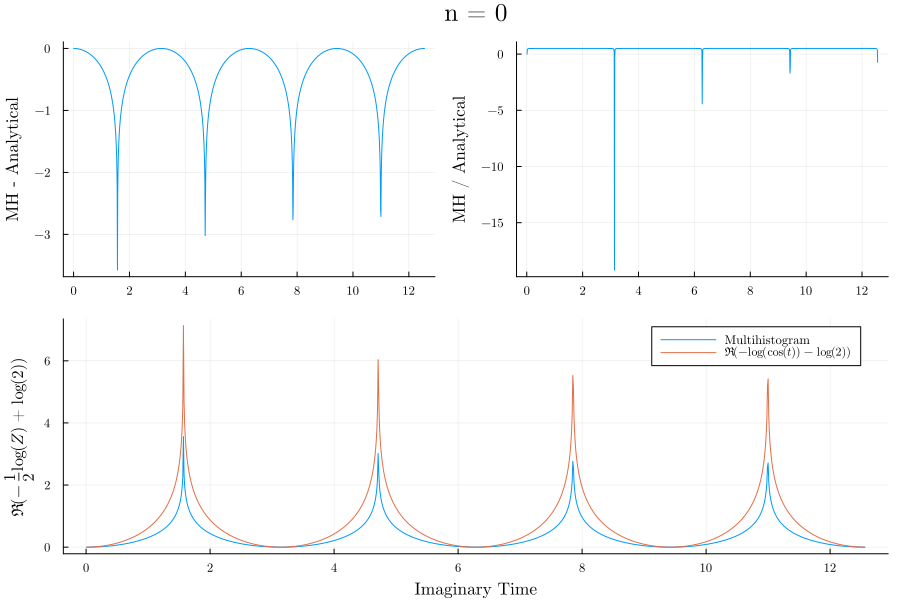

In [213]:
l = @layout [a b ; c]
MH = real.(-1/2 .* DQPT_O0 .+ log(2)) .- real.(-1/2 .* DQPT_O0 .+ log(2))[1]
AN = (x -> analytical_dqpt(x, 0)).(imrange)
fig1 = plot(imrange, MH, label = "Multihistogram", ylabel = L"\Re(-\frac{1}{2} \log(Z) + \log(2))", xlabel = "Imaginary Time")
plot!(fig1, imrange, AN, label = L"\Re(-\log(\cos(t)) - \log(2))")

diff_fig = plot(imrange, MH .- AN, ylabel = "MH - Analytical")
ratio_fig = plot(imrange, MH ./ AN, ylabel = "MH / Analytical")
order0 = plot(diff_fig, ratio_fig, fig1, layout = l, plot_title = "n = 0")

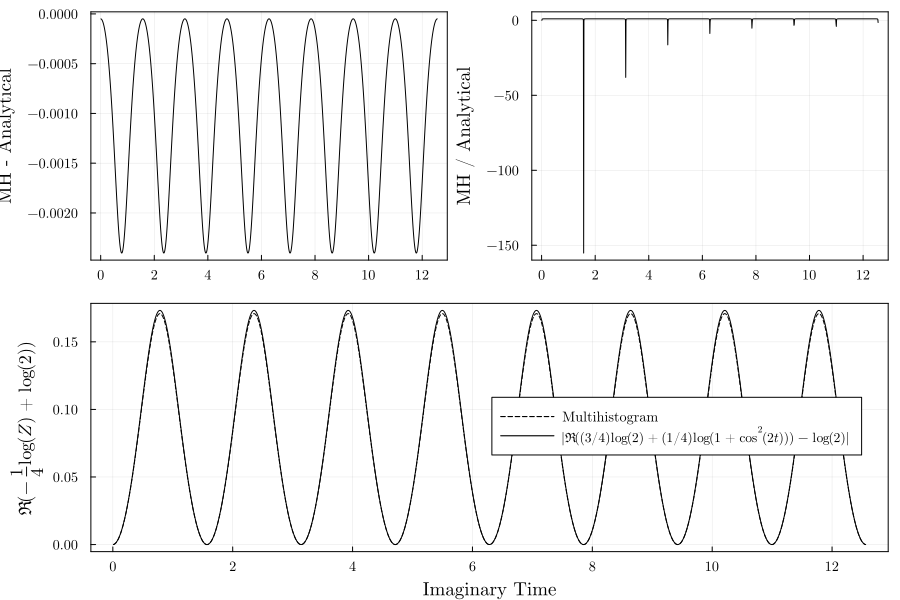

In [160]:
l = @layout [a b ; c]
MH = real.(-1/4 .* DQPT_O1 .+ log(2)) .- real.(-1/4 .* DQPT_O1 .+ log(2))[1]
AN = (x -> analytical_dqpt(x, 1)).(imrange)

fig1 = plot(imrange, MH, label = "Multihistogram", ylabel = L"\Re(-\frac{1}{4} \log(Z) + \log(2))", xlabel = "Imaginary Time", legend = :right, linestyle = :dash)
plot!(fig1, imrange, AN, label = L"|\Re( (3/4) \log(2) + (1/4) \log(1 + \cos^2(2t)) ) - \log(2)|")

diff_fig = plot(imrange, MH .- AN, ylabel = "MH - Analytical")
ratio_fig = plot(imrange, MH ./ AN, ylabel = "MH / Analytical")
order1 = plot(diff_fig, ratio_fig, fig1, layout = l)

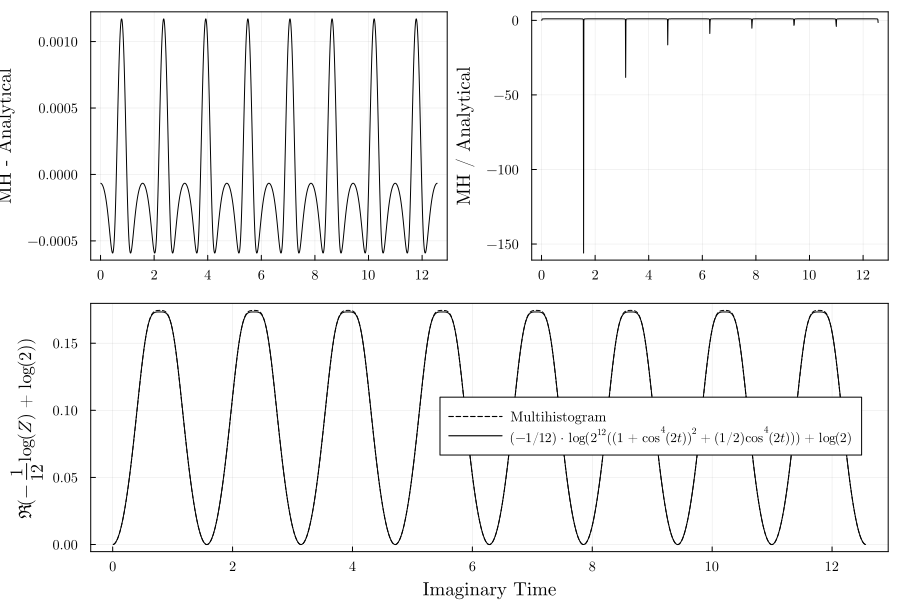

In [159]:
l = @layout [a b ; c]
MH = real.(-1/12 .* DQPT_O2 .+ log(2)) .- real.(-1/12 .* DQPT_O2 .+ log(2))[1]
AN = (x -> analytical_dqpt(x, 2)).(imrange)

fig1 = plot(imrange, MH, label = "Multihistogram", ylabel = L"\Re(-\frac{1}{12} \log(Z) + \log(2))", xlabel = "Imaginary Time", legend = :right, linestyle = :dash)
plot!(fig1, imrange, AN, label = L"(-1/12) \cdot \log(2^{12} ((1+\cos^4(2t))^2 + (1/2) \cos^4(2t))  ) + \log(2)")

diff_fig = plot(imrange, MH .- AN, ylabel = "MH - Analytical")
ratio_fig = plot(imrange, MH ./ AN, ylabel = "MH / Analytical")
order2 = plot(diff_fig, ratio_fig, fig1, layout = l)

In [161]:
savefig(order1, "order1.png")
savefig(order2, "order2.png")

"/home/cocoa_ug22/hierarchical_lattice_runs/order2.png"

In [92]:
function gv(dict, key, default)
    if key in keys(dict)
        return dict[key]
    else
        return default
    end
end
function ρ(E, MHData, Edicts, ulim)
    Z = exp.(MHData.free_energies)
    Tvec = MHData.parameter_values
    J = min(length(MHData.parameter_values), ulim)
    total = 0
    num = sum([gv(Edicts[i], E, 0) for i in 1:J])
    den = [exp.(-MHData.free_energies[j]-((1/Tvec[j])*E)) for j in 1:J]
    return num/MultihistogramAnalysis.logsum(den)
end

ρ (generic function with 2 methods)

In [75]:
diamond_ising_lattice(2, :zero)

{12, 16} undirected Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)

In [86]:
exp(MultihistogramAnalysis.logsum([-1, -2, 0, 2, 1]))

11.61055265179775

In [85]:
sum(exp.([-1, -2, 0, 2, 1]))

11.61055265179775

In [87]:
length(MHData2.marginal_energy_histograms)

46

In [138]:
cutoff_idx = 46
MHData2_cutoff = MultihistogramData(2, collect(Trange)[1:cutoff_idx], O2_hists[1:cutoff_idx])
calculate_free_energies!(MHData2_cutoff)

[ Info: Generating marginal histograms and tuple iterators
Minimizing:  Time: 0:00:01 (42 iterations)20)


46-element Vector{Float64}:
 12.249224858528086
  9.786746244776866
  8.171010990985625
  7.087321915711249
  6.34203236164858
  5.81406200907952
  5.428548999651075
  5.1390850817320795
  4.916349725977429
  4.741305284394457
  4.601223352889469
  4.487352148758028
  4.393518737131356
  ⋮
  3.815600909203911
  3.809025754711519
  3.802927869195112
  3.7972620569914386
  3.791988355746382
  3.7870713249665067
  3.7824794449994172
  3.7781846072660974
  3.774161680237371
  3.7703881385513336
  3.766843744981043
  3.763510276811827

In [139]:
let
    n = cutoff_idx
    Edicts = Dict.(pairs.(MHData2.marginal_energy_histograms[1:n]))
    Erange = -16:4:16
    f(E) = ρ(E, MHData2, Edicts, n)
    plot(Erange, f.(Erange), xlabel = "Energy", ylabel = "Frequency")
end

In [140]:
function logsum(logterms::Vector{ComplexF64})
    lr = real.(logterms)
    maxidx = findfirst(==(maximum(lr)), lr)
    maxterm = logterms[maxidx]
    logterms_filtered = filter(x -> x != maxterm, logterms)
    return maxterm + log1p(sum(exp.(logterms_filtered .- maxterm)))
end
function logsum(logterms)
    lm = maximum(logterms)
    logterms_removed = filter(!=(lm), logterms)
    return lm + log1p(sum(exp.(logterms_removed .- lm)))
end
function interpolate_free_energy_logsum_sym(parameter_value::T, data::MultihistogramData; isbeta = false) where T
    if !isbeta
        β = 1/parameter_value
    else
        β = parameter_value
    end
    
    Tvec = data.parameter_values
    Evec = data.marginal_energy_histograms
    u    = data.free_energies
    J    = length(Tvec)
    A    = -1/2 * (maximum(u) + minimum(u))
    nterms = sum([length(H) for H in Evec])
    
    logterms = zeros(T, 2nterms)
    offset = 0
    for i in 1:J
        iterthing = collect(pairs(Evec[i]))

        Threads.@threads for idx in 1:length(iterthing)
            E = first(iterthing[idx])
            f = last(iterthing[idx])
            logterms[offset + idx] = log(f) - logsum([
                -A-u[j]+(β - 1/Tvec[j])*E for j in 1:J
            ])
            logterms[offset + nterms + idx] = log(f) - logsum([
                -A-u[j]-(β - 1/Tvec[j])*E for j in 1:J
            ])
        end

        offset += length(iterthing)
    end

    return logsum(logterms)
end

interpolate_free_energy_logsum_sym (generic function with 1 method)

In [141]:
DQPT_O2_cutoff = (x -> interpolate_free_energy(x, MHData2_cutoff, isbeta = true)).(imrange .* 1im)
DQPT_O2_cutoff_sym = (x -> interpolate_free_energy_logsum_sym(x, MHData2_cutoff, isbeta = true)).(imrange .* 1im)

1256-element Vector{ComplexF64}:
  5.356528979348321 - 0.07325519993536249im
  5.350447614438132 - 0.14654319920715317im
 5.3402876575627705 - 0.21989672376873975im
  5.326012028204344 - 0.29334834644748914im
 5.3075676718055425 - 0.36693039393424953im
  5.284884353013732 - 0.440674832432985im
  5.257873005390016 - 0.5146131219665809im
   5.22642355219379 - 0.5887760263764907im
   5.19040207946921 - 0.6631933616496211im
  5.149647197681702 - 0.737893658690267im
 5.1039653660207875 - 0.8129037069689561im
  5.053124865759408 - 0.8882479309166587im
  4.996847982618743 - 0.9639475286906893im
                    ⋮
  5.072189650070316 - 200.20106727481138im
  5.121128372702774 - 200.27628757158928im
   5.16499738862217 - 200.35118223562588im
  5.204013761849113 - 200.42577663496485im
   5.23835874645073 - 200.50009825317488im
   5.26818327966444 - 200.5741761332075im
  5.293612250131259 - 200.6480404689491im
  5.314747819350609 - 200.72172230233252im
 5.3316719972529185 - 200.7952532964108im

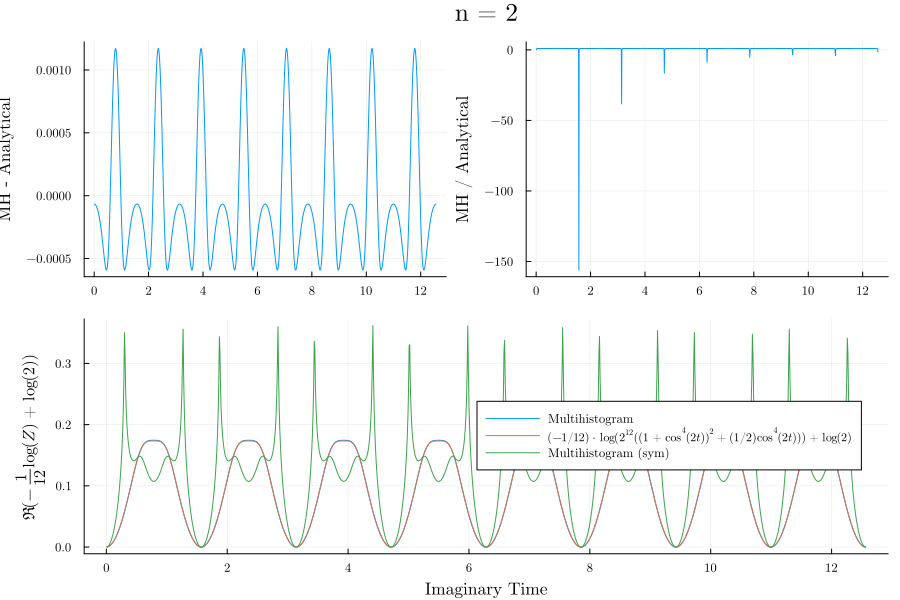

In [142]:
l = @layout [a b ; c]
MH = real.(-1/12 .* DQPT_O2_cutoff .+ log(2)) .- real.(-1/12 .* DQPT_O2_cutoff .+ log(2))[1]
MH_sym = real.(-1/12 .* DQPT_O2_cutoff_sym .+ log(2)) .- real.(-1/12 .* DQPT_O2_cutoff_sym .+ log(2))[1]
AN = (x -> analytical_dqpt(x, 2)).(imrange)

fig1 = plot(imrange, MH, label = "Multihistogram", ylabel = L"\Re(-\frac{1}{12} \log(Z) + \log(2))", xlabel = "Imaginary Time", legend = :right)
plot!(fig1, imrange, AN, label = L"(-1/12) \cdot \log(2^{12} ((1+\cos^4(2t))^2 + (1/2) \cos^4(2t))  ) + \log(2)")
plot!(fig1, imrange, MH_sym, label = "Multihistogram (sym)")

diff_fig = plot(imrange, MH .- AN, ylabel = "MH - Analytical")
ratio_fig = plot(imrange, MH ./ AN, ylabel = "MH / Analytical")
order2 = plot(diff_fig, ratio_fig, fig1, layout = l, plot_title = "n = 2")

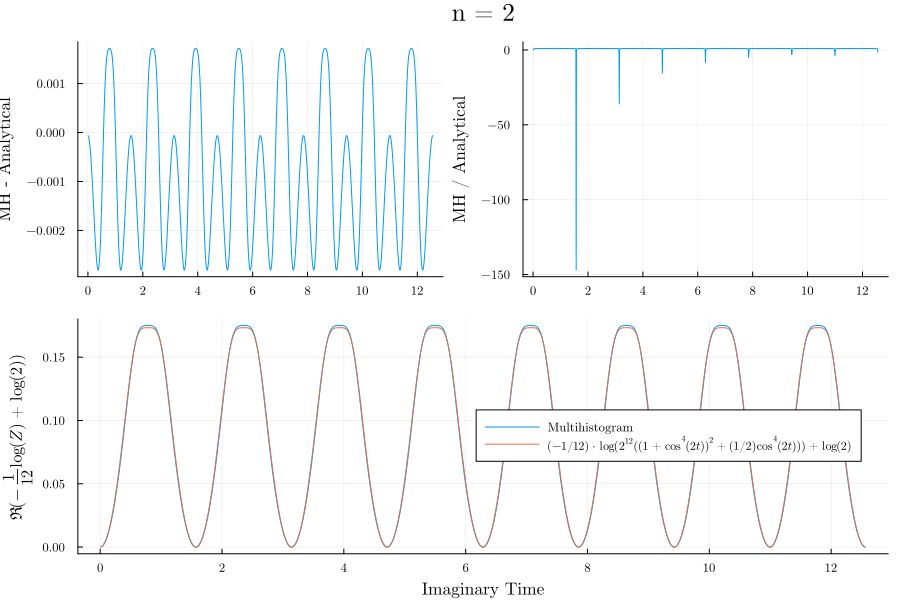

In [105]:
l = @layout [a b ; c]
MH = real.(-1/12 .* DQPT_O2 .+ log(2)) .- real.(-1/12 .* DQPT_O2 .+ log(2))[1]
AN = (x -> analytical_dqpt(x, 2)).(imrange)

fig1 = plot(imrange, MH, label = "Multihistogram", ylabel = L"\Re(-\frac{1}{12} \log(Z) + \log(2))", xlabel = "Imaginary Time", legend = :right)
plot!(fig1, imrange, AN, label = L"(-1/12) \cdot \log(2^{12} ((1+\cos^4(2t))^2 + (1/2) \cos^4(2t))  ) + \log(2)")

diff_fig = plot(imrange, MH .- AN, ylabel = "MH - Analytical")
ratio_fig = plot(imrange, MH ./ AN, ylabel = "MH / Analytical")
order2 = plot(diff_fig, ratio_fig, fig1, layout = l, plot_title = "n = 2")

In [228]:
savefig(order0, "order0.png")
savefig(order1, "order1.png")
savefig(order2, "order2.png")

"/home/cocoa_ug22/hierarchical_lattice_runs/order2.png"